<a href="https://colab.research.google.com/github/smitaforward/Data_Science/blob/master/photo_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!curl https://course-v3.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   287  100   287    0     0    810      0 --:--:-- --:--:-- --:--:--   808
bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">'


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
path = 'gdrive/My Drive/Sample'

In [1]:
os.listdir(path)

NameError: ignored

In [0]:
tfms = get_transforms(do_flip=False)

In [0]:
data = ImageDataBunch.from_folder('gdrive/My Drive/Sample', train = '.',valid_pct=0.2,
ds_tfms=tfms, size=224,bs=32, num_workers=1).normalize(imagenet_stats)

In [18]:
data.classes

['No', 'Yes']

In [19]:
data.c

2

In [20]:
len(data.train_ds), len(data.valid_ds)

(64, 15)

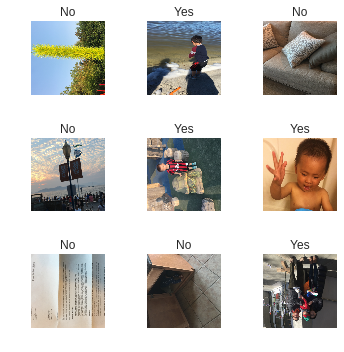

In [21]:
data.show_batch(rows=3, figsize=(5,5))

In [22]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 19418145.99it/s]


In [23]:

learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.855069,0.791616,0.400000
2,0.710333,0.795683,0.266667
3,0.528907,0.820992,0.266667
4,0.417373,0.597497,0.266667


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
losses, idxs = interp.top_losses()

In [29]:
len(data.valid_ds) == len(losses)==len(idxs)

True

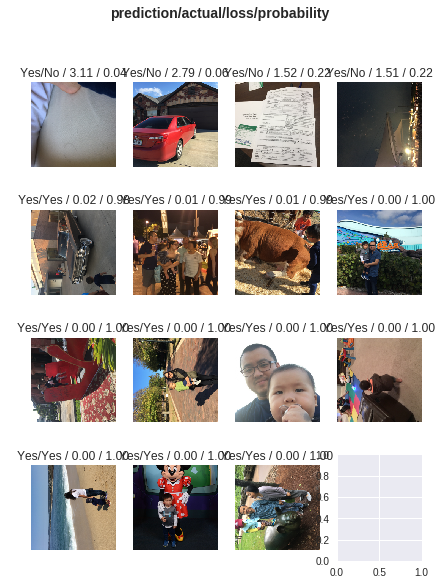

In [33]:
interp.plot_top_losses(15, figsize = (7,9))

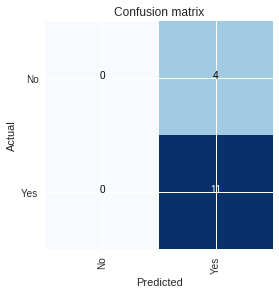

In [32]:
interp.plot_confusion_matrix()

In [34]:
interp.most_confused()

[('No', 'Yes', 4)]

In [0]:

learn.unfreeze()

In [37]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.104806,0.251045,0.066667


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

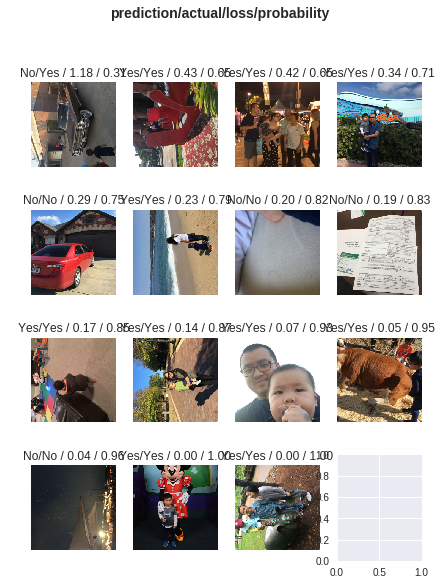

In [39]:
interp.plot_top_losses(15, figsize = (7,9))

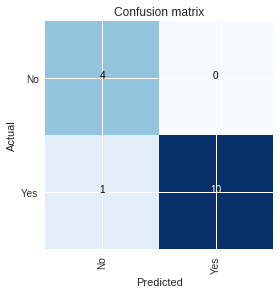

In [41]:
interp.plot_confusion_matrix()

In [0]:
learn.save('final_photo_classifier')

In [43]:
os.getcwd()

'/content'